Anggota Kelompok :

Muchamad hafiz Trio Saputra - 2702422080

Tsalasa Kale Syamsu Machdita - 2602168425

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

for filename in os.listdir('.'):
    print(filename)

.config
sample_data


In [14]:
import pandas as pd

df1 = pd.read_csv('./Oktober.csv')
df2 = pd.read_csv('./November.csv')

combined_df = pd.concat([df1, df2], ignore_index=True)

print(combined_df.head())

      tanggal  kopi_aren  kopi_ungu  kopi_coklat  kopi_creamy  awan_bengi  \
0  01/10/2024          4          3            8            7           9   
1  02/10/2024          2          3            8            7           4   
2  03/10/2024          6          7            4            8           4   
3  04/10/2024          3          4            2            7           2   
4  05/10/2024          7          6            8            4           3   

   ice_tea  milk_tea  melon_tea  yakult_leci  lemon_tea  leci_tea  hot_tea  \
0        5         4          3            5          6         7        8   
1        3         2          1            3          3         1        3   
2        4         4          3            7          8         2        3   
3        4         8          7            9          5         4        3   
4        7         8          9            4          4         7        8   

   lotus_latte  
0            5  
1            2  
2            2  


In [22]:
combined_df['tanggal'] = pd.to_datetime(combined_df['tanggal'], format="%d/%m/%Y") # Changed the format string to match the actual date format in the data
print(combined_df.head())

     tanggal  kopi_aren  kopi_ungu  kopi_coklat  kopi_creamy  awan_bengi  \
0 2024-10-01          4          3            8            7           9   
1 2024-10-02          2          3            8            7           4   
2 2024-10-03          6          7            4            8           4   
3 2024-10-04          3          4            2            7           2   
4 2024-10-05          7          6            8            4           3   

   ice_tea  milk_tea  melon_tea  yakult_leci  lemon_tea  leci_tea  hot_tea  \
0        5         4          3            5          6         7        8   
1        3         2          1            3          3         1        3   
2        4         4          3            7          8         2        3   
3        4         8          7            9          5         4        3   
4        7         8          9            4          4         7        8   

   lotus_latte  
0            5  
1            2  
2            2  
3     

In [23]:
combined_df['bulan'] = combined_df['tanggal'].dt.to_period('M')
sales_per_month1 = combined_df.groupby('bulan')[['kopi_aren', 'kopi_ungu', 'kopi_coklat', 'kopi_creamy',
                                                 'awan_bengi', 'ice_tea', 'milk_tea', 'melon_tea', 'yakult_leci', 'lemon_tea', 'leci_tea', 'hot_tea', 'lotus_latte']].sum()
print(sales_per_month1)

         kopi_aren  kopi_ungu  kopi_coklat  kopi_creamy  awan_bengi  ice_tea  \
bulan                                                                          
2024-10         91        108          105          105         108      101   
2024-11         54         64           86           60          62       65   

         milk_tea  melon_tea  yakult_leci  lemon_tea  leci_tea  hot_tea  \
bulan                                                                     
2024-10       101        119          111        105       131       92   
2024-11        49         55           69         59        69       62   

         lotus_latte  
bulan                 
2024-10           97  
2024-11           63  


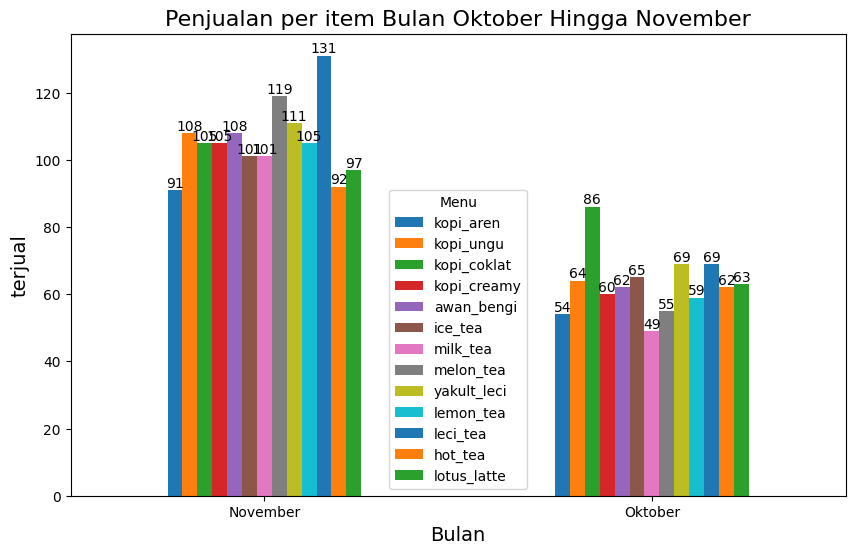

In [24]:
# Sel ini mengimpor library matplotlib dan memvisualisasikan jumlah
# penjualan saos lombok dan tomat pada bulan Juni, Juli, dan
# Agustus dalam bentuk grafik batang
import matplotlib.pyplot as plt

ax = sales_per_month1.plot(kind='bar', figsize=(10, 6), legend=True)

plt.title('Penjualan per item Bulan Oktober Hingga November', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('terjual', fontsize=14)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.xticks(ticks=range(len(sales_per_month1)), labels=['November', 'Oktober'], rotation=0)


plt.legend(title='Menu')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
plt.show()

Visualisasi Penjualan dalam bulan november dan oktober secara terpisah agar dapat mengetahui tren perbulanya.

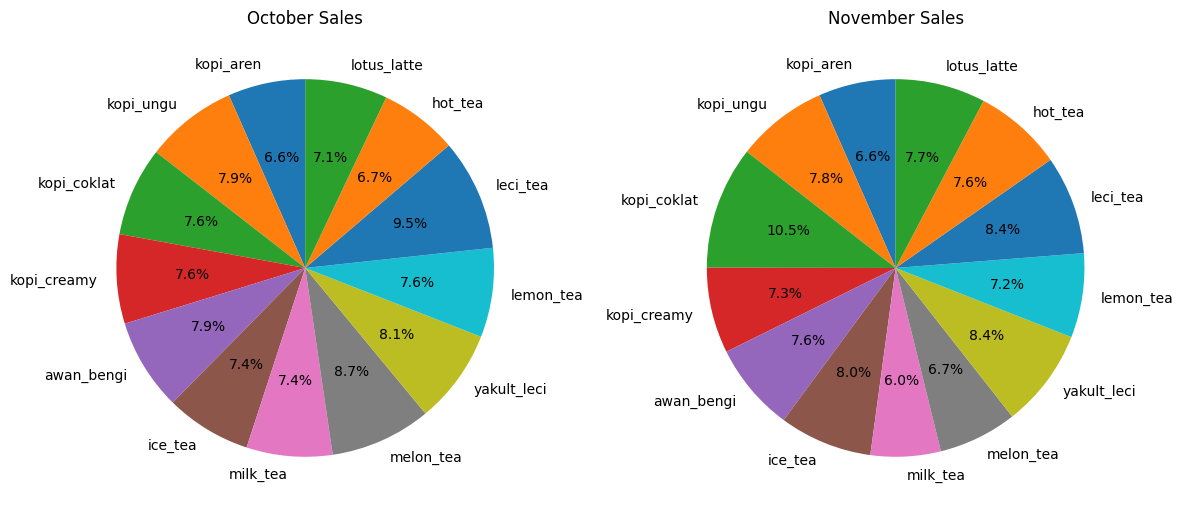

In [27]:
# Create separate DataFrames for October and November
october_sales = sales_per_month1.loc['2024-10']  # Assuming your data is from 2023
november_sales = sales_per_month1.loc['2024-11']

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns for the charts

# October pie chart
axes[0].pie(october_sales, labels=october_sales.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('October Sales')

# November pie chart
axes[1].pie(november_sales, labels=november_sales.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('November Sales')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Gambar di atas menunjukan Visualisasi Penjualan atau Item ter laris. menggunakan chart Pie

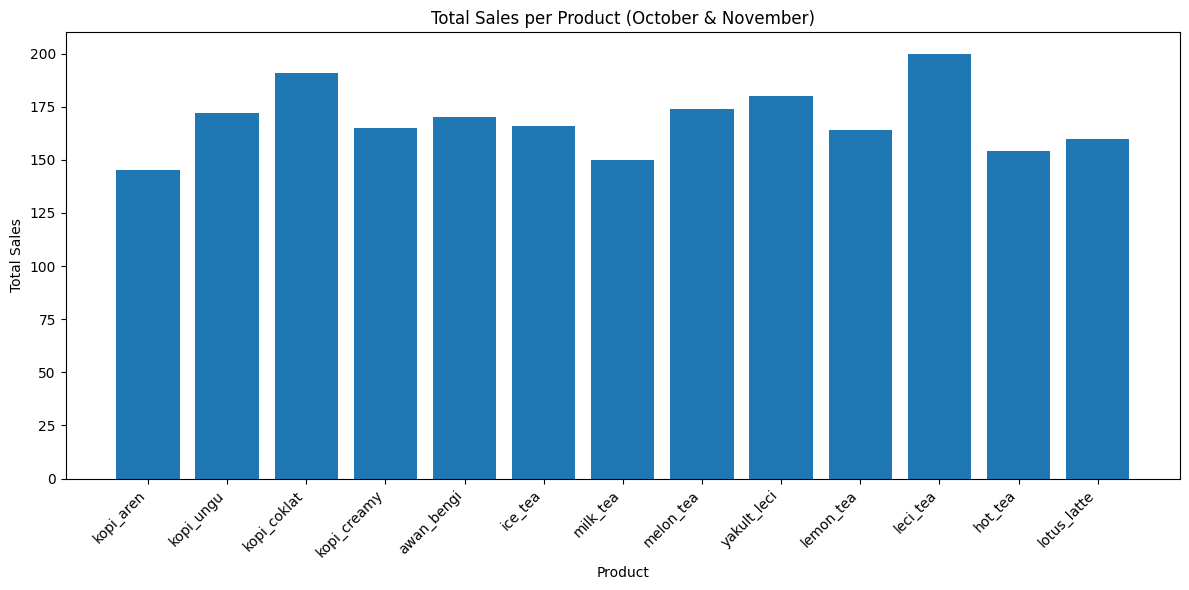

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_df is already loaded and 'tanggal' is converted to datetime
combined_df['tanggal'] = pd.to_datetime(combined_df['tanggal'])
combined_df['bulan'] = combined_df['tanggal'].dt.to_period('M')

# Get the total sales for each product
product_sales = combined_df[['kopi_aren', 'kopi_ungu', 'kopi_coklat', 'kopi_creamy',
                             'awan_bengi', 'ice_tea', 'milk_tea', 'melon_tea', 'yakult_leci',
                             'lemon_tea', 'leci_tea', 'hot_tea', 'lotus_latte']].sum()

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(product_sales.index, product_sales.values)
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.title("Total Sales per Product (October & November)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Gambar di atas menunjukan Visualisasi Penjualan atau Item ter laris dari gabungan kedua bulan. menggunakan chart batang

In [28]:
df3 = pd.read_csv('./income.csv')

print(df3.to_string())


       bulan       produk  terjual  harga    total
0    oktober    kopi_aren       91  12000  1092000
1    oktober    kopi_ungu      105  12000  1260000
2    oktober  kopi_coklat      105  12000  1260000
3    oktober  kopi_creamy      105  12000  1260000
4    oktober   awan_bengi      108  12000  1296000
5    oktober      ice_tea      101   5000   505000
6    oktober     milk_tea      101  12000  1212000
7    oktober    melon_tea      119   8000   952000
8    oktober  yakult_leci      111   8000   888000
9    oktober    lemon_tea      105   8000   840000
10   oktober     leci_tea      131   8000  1048000
11   oktober      hot_tea       92   5000   460000
12   oktober  lotus_latte       97  12000  1164000
13  november    kopi_aren       54  12000   648000
14  november    kopi_ungu       64  12000   768000
15  november  kopi_coklat       86  12000  1032000
16  november  kopi_creamy       60  12000   720000
17  november   awan_bengi       62  12000   744000
18  november      ice_tea      

In [31]:
import pandas as pd

df3 = pd.read_csv('./income.csv')
print(df3[['produk', 'total']])

         produk    total
0     kopi_aren  1092000
1     kopi_ungu  1260000
2   kopi_coklat  1260000
3   kopi_creamy  1260000
4    awan_bengi  1296000
5       ice_tea   505000
6      milk_tea  1212000
7     melon_tea   952000
8   yakult_leci   888000
9     lemon_tea   840000
10     leci_tea  1048000
11      hot_tea   460000
12  lotus_latte  1164000
13    kopi_aren   648000
14    kopi_ungu   768000
15  kopi_coklat  1032000
16  kopi_creamy   720000
17   awan_bengi   744000
18      ice_tea   325000
19     milk_tea   588000
20    melon_tea   440000
21  yakult_leci   552000
22    lemon_tea   472000
23     leci_tea   552000
24      hot_tea   310000
25  lotus_latte   636000


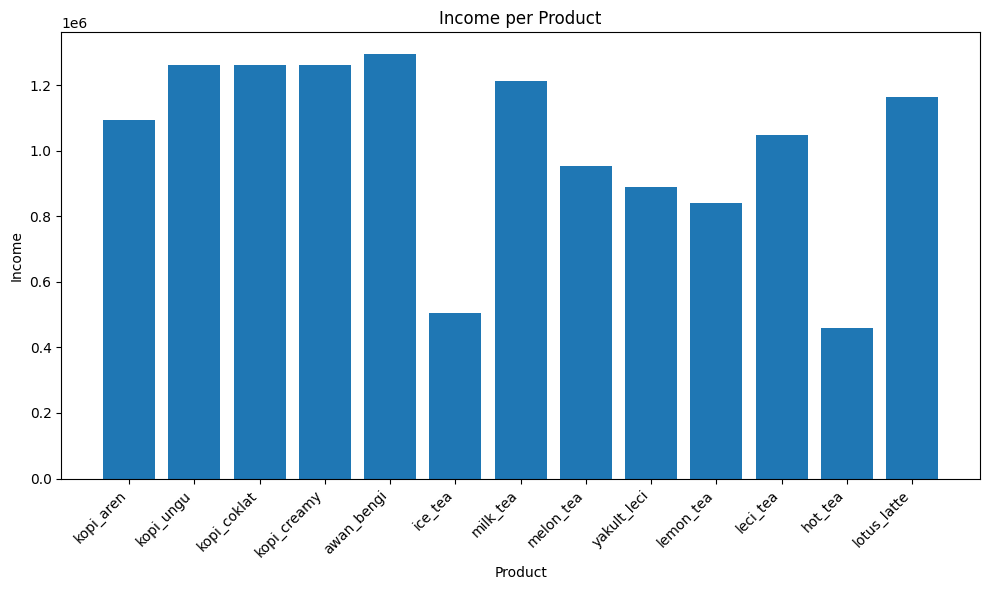

In [37]:
# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(df3['produk'], df3['total'])
plt.xlabel("Product")
plt.ylabel("Income")
plt.title("Income per Product")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Visualisasi Menggunakan Chart Batang untuk menganalisa pendapatan per item dari bulan november dan oktober